## Uczenie maszynowe UMZ 2018/2019
# 4. Regresja wielomianowa

## 4.1. Regresja wielomianowa

### Wybór cech

Zadanie: przewidzieć cenę działki o kształcie prostokąta.

Jakie cechy wybrać?

 * $x_1$ – szerokość działki, $x_2$ – długość działki:
$$ h_{\theta}(\vec{x}) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

 * $x_1$ – powierzchnia działki:
$$ h_{\theta}(\vec{x}) = \theta_0 + \theta_1 x_1 $$

### Regresja wielomianowa

In [5]:
# Przydatne importy

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [6]:
# Przydatne funkcje

# Wersja macierzowa funkcji kosztu
def cost(theta, X, y):
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()

# Wersja macierzowa gradientu funkcji kosztu
def gradient(theta, X, y):
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

# Algorytm gradientu prostego (wersja macierzowa)
def gradient_descent(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-5):
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) > 10**15:
            print('Algorithm does not converge!')
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta]) 
    return theta, logs

# Wykres danych (wersja macierzowa)
def plot_data(X, y, xlabel, ylabel):    
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

# Wykres funkcji fun
def plot_fun(fig, fun, X):
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    Arg = np.arange(x0, x1, 0.1)
    Val = fun(Arg)
    return ax.plot(Arg, Val, linewidth='2')

In [7]:
# Wczytanie danych (mieszkania) przy pomocy biblioteki pandas

alldata = pandas.read_csv('data_flats.tsv', header=0, sep='\t',
                          usecols=['price', 'rooms', 'sqrMetres'])
data = np.matrix(alldata[['sqrMetres', 'price']])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n]
Xn /= np.amax(Xn, axis=0)
Xn2 = np.power(Xn, 2) 
Xn2 /= np.amax(Xn2, axis=0)
Xn3 = np.power(Xn, 3) 
Xn3 /= np.amax(Xn3, axis=0)

X = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
X2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2), axis=1)).reshape(m, 2 * n + 1)
X3 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2, Xn3), axis=1)).reshape(m, 3 * n + 1)
y = np.matrix(data[:, -1]).reshape(m, 1)

Postać ogólna regresji wielomianowej:

$$ h_{\theta}(x) = \sum_{i=0}^{n} \theta_i x^i $$

In [24]:
# Funkcja regresji wielomianowej

def h_poly(Theta, x):
    return sum(theta * np.power(x, i) for i, theta in enumerate(Theta.tolist()))

def polynomial_regression(theta):
    return lambda x: h_poly(theta, x)

Funkcja kwadratowa:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$

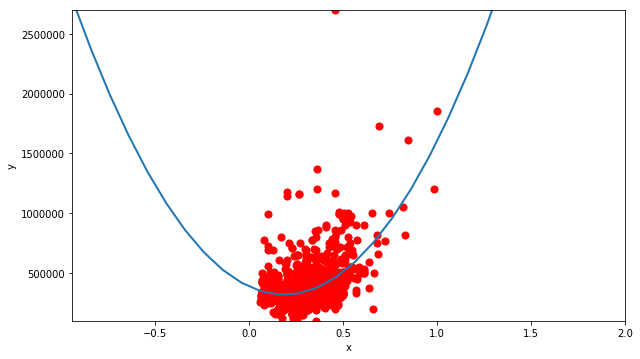

In [ ]:
fig = plot_data(X2, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0, 0]).reshape(3, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, X2, y)
plot_fun(fig, polynomial_regression(theta), X)

Funkcja sześcienna:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 $$

In [ ]:
fig = plot_data(X3, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0, 0, 0]).reshape(4, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X3, y)
plot_fun(fig, polynomial_regression(theta), X)

print(theta)

Regresję wielomianową można potraktować jako szczególny przypadek regresji liniowej wielu zmiennych:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 $$
$$ x_1 = x, \quad x_2 = x^2, \quad x_3 = x^3, \quad \vec{x} = \left[ \begin{array}{ccc} x_0 \\ x_1 \\ x_2 \end{array} \right] $$

Uwaga praktyczna: przyda się normalizacja cech, szczególnie skalowanie!

W ten sposób możemy stosować również inne „pochodne” cechy, np.:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 \sqrt{x} $$
$$ x_1 = x, \quad x_2 = \sqrt{x}, \quad \vec{x} = \left[ \begin{array}{ccc} x_0 \\ x_1 \end{array} \right] $$

### Wielomianowa regresja logistyczna

Podobne modyfikacje cech możemy również stosować dla regresji logistycznej.

In [8]:
def powerme(x1,x2,n):
    X = []
    for m in range(n+1):
        for i in range(m+1):
            X.append(np.multiply(np.power(x1,i),np.power(x2,(m-i))))
    return np.hstack(X)

In [9]:
# Wczytanie danych
import pandas
import numpy as np

alldata = pandas.read_csv('polynomial_logistic.tsv', sep='\t')
data = np.matrix(alldata)

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 1:]

Xpl = powerme(data[:, 1], data[:, 2], n)
Ypl = np.matrix(data[:, 0]).reshape(m, 1)

data[:10]

matrix([[ 1.        ,  0.36596696, -0.11214686],
        [ 0.        ,  0.4945305 ,  0.47110656],
        [ 0.        ,  0.70290604, -0.92257983],
        [ 0.        ,  0.46658862, -0.62269739],
        [ 0.        ,  0.87939462, -0.11408015],
        [ 0.        , -0.331185  ,  0.84447667],
        [ 0.        , -0.54351701,  0.8851383 ],
        [ 0.        ,  0.91979241,  0.41607012],
        [ 0.        ,  0.28011742,  0.61431157],
        [ 0.        ,  0.94754363, -0.78307311]])

In [10]:
# Wykres danych (wersja macierzowa)
def plot_data_for_classification(X, Y, xlabel, ylabel):    
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    X = X.tolist()
    Y = Y.tolist()
    X1n = [x[1] for x, y in zip(X, Y) if y[0] == 0]
    X1p = [x[1] for x, y in zip(X, Y) if y[0] == 1]
    X2n = [x[2] for x, y in zip(X, Y) if y[0] == 0]
    X2p = [x[2] for x, y in zip(X, Y) if y[0] == 1]
    ax.scatter(X1n, X2n, c='r', marker='x', s=50, label='Dane')
    ax.scatter(X1p, X2p, c='g', marker='o', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    return fig

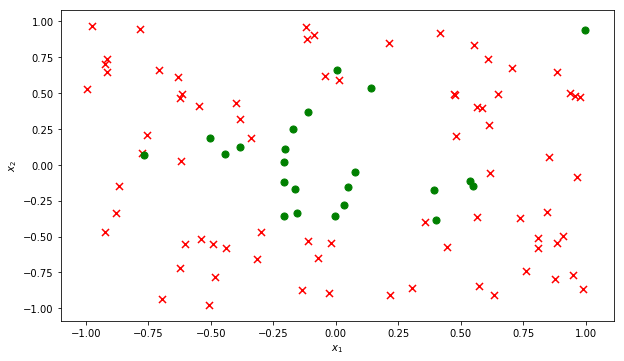

In [11]:
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r'$x_1$', ylabel=r'$x_2$')

Propozycja hipotezy:

$$ h_\theta(x) = g(\theta^T x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5) \; , $$

gdzie $g$ – funkcja logistyczna, $x_3 = x_1^2$, $x_4 = x_2^2$, $x_5 = x_1 x_2$.

In [12]:
def safeSigmoid(x, eps=0):
    y = 1.0/(1.0 + np.exp(-x))
    if eps > 0:
        y[y < eps] = eps
        y[y > 1 - eps] = 1 - eps
    return y

def h(theta, X, eps=0.0):
    return safeSigmoid(X*theta, eps)

def J(h,theta,X,y, lamb=0):
    m = len(y)
    f = h(theta, X, eps=10**-7)
    j = -np.sum(np.multiply(y, np.log(f)) + 
                np.multiply(1 - y, np.log(1 - f)), axis=0)/m
    if lamb > 0:
        j += lamb/(2*m) * np.sum(np.power(theta[1:],2))
    return j

def dJ(h,theta,X,y,lamb=0):
    g = 1.0/y.shape[0]*(X.T*(h(theta,X)-y))
    if lamb > 0:
        g[1:] += lamb/float(y.shape[0]) * theta[1:] 
    return g

def classifyBi(theta, X):
    prob = h(theta, X)
    return prob

In [13]:
# Metoda gradientu prostego dla regresji logistycznej
def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, maxSteps=10000):
    errorCurr = fJ(h, theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        # oblicz nowe theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # raportuj poziom błędu
        errorCurr, errorPrev = fJ(h, theta, X, y), errorCurr
        # kryteria stopu
        if abs(errorPrev - errorCurr) <= eps:
            break
        if len(errors) > maxSteps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

In [14]:
# Uruchomienie metody gradientu prostego dla regresji logistycznej
theta_start = np.matrix(np.zeros(Xpl.shape[1])).reshape(Xpl.shape[1],1)
theta, errors = GD(h, J, dJ, theta_start, Xpl, Ypl, 
                       alpha=0.1, eps=10**-7, maxSteps=10000)
print(r'theta = {}'.format(theta))

theta = [[ 1.59558981]
 [ 0.12602307]
 [ 0.65718518]
 [-5.26367581]
 [ 1.96832544]
 [-6.97946065]]


In [15]:
# Wykres granicy klas
def plot_decision_boundary(fig, theta, X):
    ax = fig.axes[0]
    xx, yy = np.meshgrid(np.arange(-1.0, 1.0, 0.02),
                         np.arange(-1.0, 1.0, 0.02))
    l = len(xx.ravel())
    C = powerme(xx.reshape(l, 1), yy.reshape(l, 1), n)
    z = classifyBi(theta, C).reshape(int(np.sqrt(l)), int(np.sqrt(l)))

    plt.contour(xx, yy, z, levels=[0.5], lw=3);

/home/pawel/.local/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


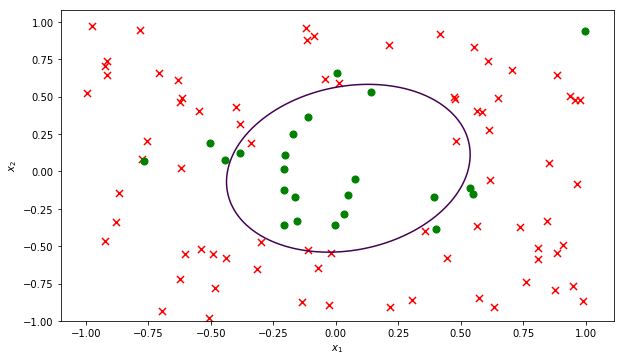

In [16]:
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r'$x_1$', ylabel=r'$x_2$')
plot_decision_boundary(fig, theta, Xpl)

In [17]:
# Wczytanie danych

alldata = pandas.read_csv('polynomial_logistic.tsv', sep='\t')
data = np.matrix(alldata)

m, n_plus_1 = data.shape
Xn = data[:, 1:]

n = 10
Xpl = powerme(data[:, 1], data[:, 2], n)
Ypl = np.matrix(data[:, 0]).reshape(m, 1)

theta_start = np.matrix(np.zeros(Xpl.shape[1])).reshape(Xpl.shape[1],1)
theta, errors = GD(h, J, dJ, theta_start, Xpl, Ypl, 
                       alpha=0.1, eps=10**-7, maxSteps=10000)

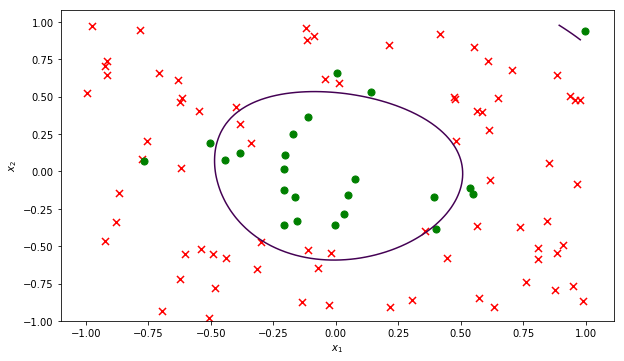

In [18]:
# Przykład dla większej liczby cech
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r'$x_1$', ylabel=r'$x_2$')
plot_decision_boundary(fig, theta, Xpl)

## 4.2. Problem nadmiernego dopasowania

### Obciążenie a wariancja

In [19]:
# Dane do prostego przykładu

data = np.matrix([
        [0.0, 0.0],
        [0.5, 1.8],
        [1.0, 4.8],
        [1.6, 7.2],
        [2.6, 8.8],
        [3.0, 9.0],
    ])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn1 = data[:, 0:n]
Xn1 /= np.amax(Xn1, axis=0)
Xn2 = np.power(Xn1, 2) 
Xn2 /= np.amax(Xn2, axis=0)
Xn3 = np.power(Xn1, 3) 
Xn3 /= np.amax(Xn3, axis=0)
Xn4 = np.power(Xn1, 4) 
Xn4 /= np.amax(Xn4, axis=0)
Xn5 = np.power(Xn1, 5) 
Xn5 /= np.amax(Xn5, axis=0)

X1 = np.matrix(np.concatenate((np.ones((m, 1)), Xn1), axis=1)).reshape(m, n + 1)
X2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn1, Xn2), axis=1)).reshape(m, 2 * n + 1)
X5 = np.matrix(np.concatenate((np.ones((m, 1)), Xn1, Xn2, Xn3, Xn4, Xn5), axis=1)).reshape(m, 5 * n + 1)
y = np.matrix(data[:, -1]).reshape(m, 1)

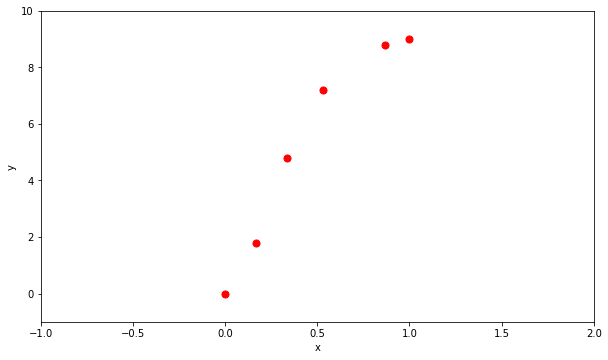

In [20]:
fig = plot_data(X1, y, xlabel='x', ylabel='y')

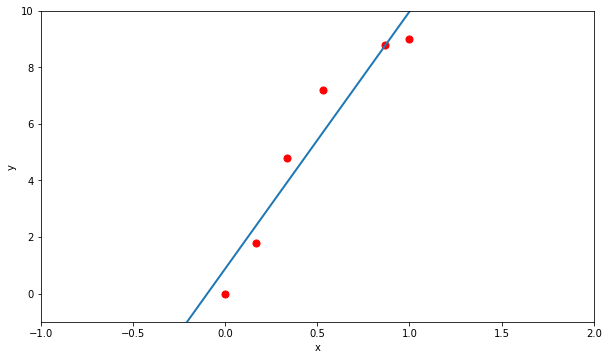

In [25]:
fig = plot_data(X1, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0]).reshape(2, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X1, y, eps=0.00001)
plot_fun(fig, polynomial_regression(theta), X1)

Ten model ma duże **obciążenie** (**błąd systematyczny**, _bias_) – zachodzi **niedostateczne dopasowanie** (_underfitting_).

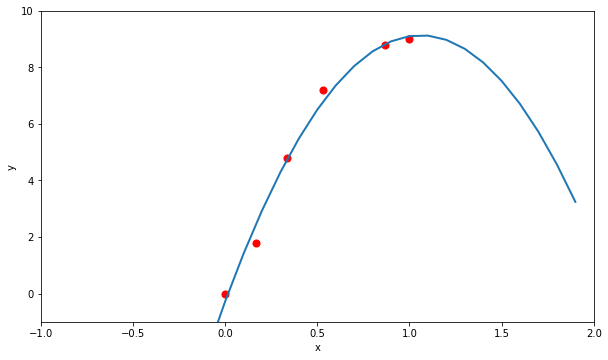

In [26]:
fig = plot_data(X2, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0, 0]).reshape(3, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X2, y, eps=0.000001)
plot_fun(fig, polynomial_regression(theta), X1)

Ten model jest odpowiednio dopasowany.

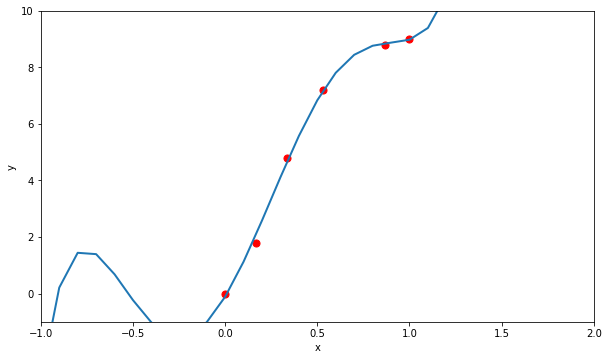

In [27]:
fig = plot_data(X5, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0, 0, 0, 0, 0]).reshape(6, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X5, y, alpha=0.5, eps=10**-7)
plot_fun(fig, polynomial_regression(theta), X1)

Ten model ma dużą **wariancję** (_variance_) – zachodzi **nadmierne dopasowanie** (_overfitting_).

<img style="margin:auto" width="90%" src="fit.png"/>

### Obciążenie (błąd systematyczny, _bias_)

* Wynika z błędnych założeń co do algorytmu uczącego się.
* Duże obciążenie powoduje niedostateczne dopasowanie.

### Wariancja (_variance_)

* Wynika z nadwrażliwości na niewielkie fluktuacje w zbiorze uczącym.
* Wysoka wariancja może spowodować nadmierne dopasowanie (modelując szum zamiast sygnału).

<img style="margin:auto" width="60%" src="bias2.png"/>

<img style="margin:auto" width="60%" src="curves.jpg"/>